In [72]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, top_k_accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [78]:
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', low_memory=False)
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [36]:
print(df.columns.tolist())

['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']


In [38]:
df.columns = df.columns.str.strip()

df['CRASH DATETIME'] = pd.to_datetime(df['CRASH DATE'] + ' ' + df['CRASH TIME'], errors='coerce')
df['hour'] = df['CRASH DATETIME'].dt.hour
df['day_of_week'] = df['CRASH DATETIME'].dt.dayofweek
df['month'] = df['CRASH DATETIME'].dt.month

In [54]:
df['hour'] = pd.to_datetime(df['CRASH TIME'], errors='coerce').dt.hour

/var/folders/pl/gpntkvf92r56cmfzv7ts8vxw0000gn/T/ipykernel_46103/817164131.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['CRASH TIME'], errors='coerce').dt.hour


In [ ]:
df = df.dropna(subset=['CRASH TIME'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce')
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')
df['HOUR'] = df['CRASH TIME'].dt.hour

In [85]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], errors='coerce')
df['HOUR'] = df['CRASH TIME'].dt.hour
df['TIME_OF_DAY'] = df['HOUR'].apply(get_time_of_day)

In [86]:
df['DEADLY'] = df['NUMBER OF PERSONS KILLED'].fillna(0).apply(lambda x: 1 if x >= 1 else 0)

In [87]:
y = df['DEADLY']

In [88]:
features = ['BOROUGH', 'VEHICLE TYPE CODE 1', 'CONTRIBUTING FACTOR VEHICLE 1', 'TIME_OF_DAY']
X = df[features].dropna()
y = df.loc[X.index, 'DEADLY']

In [89]:
for col in X.columns:
    X[col] = LabelEncoder().fit_transform(X[col])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9986764963543
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    370507
           1       0.00      0.00      0.00       478

    accuracy                           1.00    370985
   macro avg       0.50      0.50      0.50    370985
weighted avg       1.00      1.00      1.00    370985



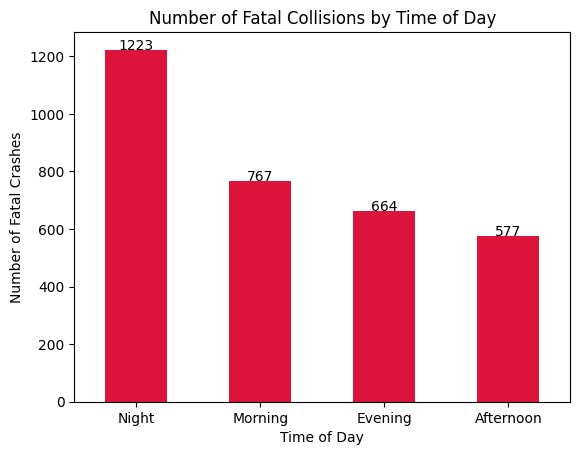

In [100]:
fatal_by_time = df[df['DEADLY'] == 1]['TIME_OF_DAY'].value_counts()
fatal_by_time.plot(kind='bar', color='crimson')
plt.title('Number of Fatal Collisions by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Fatal Crashes')
plt.xticks(rotation=0)

for i, v in enumerate(fatal_by_time):
    plt.text(i, v + 0.5, str(v), ha='center')

plt.show()

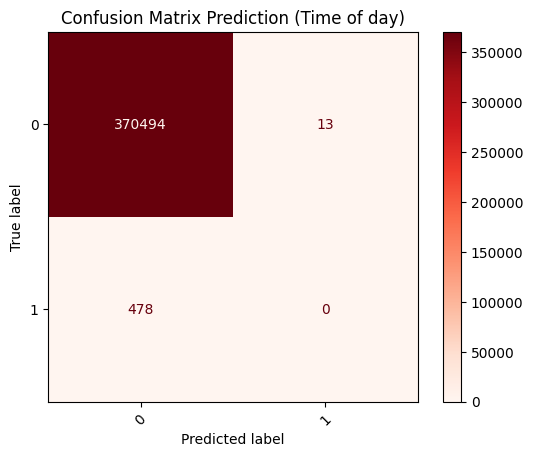

In [104]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(xticks_rotation=45, cmap='Reds')
plt.title("Confusion Matrix Prediction (Time of day)")
plt.show()

In [105]:
print(df['DEADLY'].value_counts())

DEADLY
0    2164687
1       3231
Name: count, dtype: int64


In [107]:
wrong_predictions = X_test[y_test != y_pred]
wrong_samples = df.loc[wrong_predictions.index]
wrong_samples.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,HOUR,DEADLY,TIME_OF_DAY
1997687,01/31/2013,1900-01-01 22:52:00,QUEENS,11237,40.699531,-73.911037,"(40.699531, -73.9110367)",MYRTLE AVENUE,WYCKOFF AVENUE,NaN,...,NaN,215286,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,22,1,Night
1725449,06/02/2014,1900-01-01 06:49:00,BROOKLYN,11231,40.674146,-74.006006,"(40.6741459, -74.006006)",LORRAINE STREET,HICKS STREET,NaN,...,NaN,345028,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,6,1,Morning
481700,12/13/2019,1900-01-01 22:26:00,BROOKLYN,11235,40.587414,-73.938416,"(40.587414, -73.938416)",HARING STREET,VOORHIES AVENUE,NaN,...,NaN,4258625,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,22,1,Night
2007010,12/19/2012,1900-01-01 16:32:00,STATEN ISLAND,10303,40.636022,-74.156053,"(40.6360222, -74.156053)",ERASTINA PLACE,ORINOCO PLACE,NaN,...,NaN,286557,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,16,1,Afternoon
1229521,09/06/2016,1900-01-01 11:02:00,BROOKLYN,11223,40.607840,-73.961975,"(40.60784, -73.961975)",QUENTIN ROAD,CONEY ISLAND AVENUE,NaN,...,NaN,3515998,Sedan,NaN,NaN,NaN,NaN,11,1,Morning
